Searching for some better parameters than used in `old/genderClassificationV4.ipynb` using `validation_curve`

We shall only estimate parameters for `GBC` which are the following:
`learning_rate`,     default = `0.1`

`max_features`,      default = `sqrt`

`max_depth`,         default = `15`

`min_samples_split`, default = `1000`

`min_samples_leaf`,  default = `50`

`n_estimators`,      default = `200`

In [1]:
param_dict = {
    "learning_rate": 0.1,
    "max_features": 'sqrt',
    "max_depth": 15,
    "min_samples_split": 1000,
    "min_samples_leaf": 50,
    "n_estimators": 200
}

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from pathlib import Path

np.printoptions(precision=3)

In [3]:
base = Path().resolve().parents[1] / r'data/subsets/gender_final_small'
locations = [str(base) + str(i) + '.csv' for i in range(1, 10)]

# Have 9000 names sampled at random.
X = pd.concat([pd.read_csv(location) for location in locations], axis=0)
y = X["Gender"]
X.drop(labels="Gender", inplace=True, axis=1)

In [4]:
# vectorize and convert to floats
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,10),
                             decode_error='replace', binary=True)
X = vectorizer.fit_transform(X['Name'])

scaler = MaxAbsScaler()
X = scaler.fit_transform(X)

In [5]:
# Create an instance of GBC
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Learning Rate

In [6]:
param_range = np.linspace(0.5, 1.5, 20)
param_name = 'learning_rate'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed:   28.0s remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.7s finished


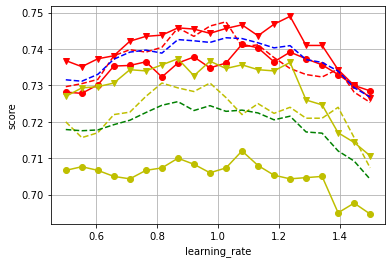

In [7]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [8]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(round(param_range[max_average_train], 3),
      round(param_range[max_average_valid], 3))

1.026 0.868


####  _Result_->Learning Rate: 0.85

In [9]:
param_dict["learning_rate"] = 0.85
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Max Features

In [10]:
param_range = ['sqrt', 'log2', 0.01, 0.05, 0.1]
graph_range = np.arange(1, len(param_range)+1)
param_name = 'max_features'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   11.5s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.0min finished


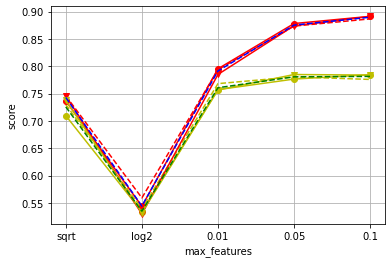

In [11]:
plt.plot(graph_range, train_score[:, 0], 'r--',
         graph_range, valid_score[:, 0], 'y--',
         graph_range, train_score[:, 1], 'ro-',
         graph_range, valid_score[:, 1], 'yo-',
         graph_range, train_score[:, 2], 'rv-',
         graph_range, valid_score[:, 2], 'yv-',
         graph_range, np.average(train_score, axis=1), 'b--',
         graph_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.xticks(ticks=graph_range, labels=param_range)
plt.grid(True)

In [12]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

0.1 0.1


#### _Results_-> Max Features: 0.05
Even though the results are better at 0.1, there is only a slight increase whereas number of features considered at
each split is doubled. I don't see any solid reason to increase it beyond 0.1 unless I didn't happen to mind
the increase in training time(which I do).

Increasing it beyond 0.1 would undoubtedly lead to an increase in bias which is already evident from `0.01` to `0.1` range

In [13]:
param_dict["max_features"] = 0.05
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Max Depth

In [14]:
param_range = np.arange(3, 11)
param_name = 'max_depth'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


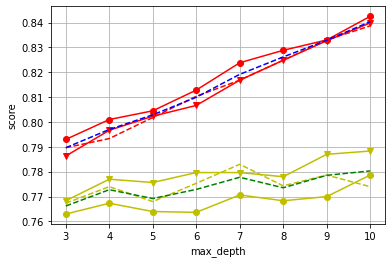

In [17]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [18]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

10 10


### _Results_ -> max_depth = 10

In [19]:
param_dict["max_depth"] = 10
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Max Samples Split


In [21]:
param_range = np.arange(500, 610, 10)
param_name = 'min_samples_split'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  33 | elapsed:  2.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.1min finished


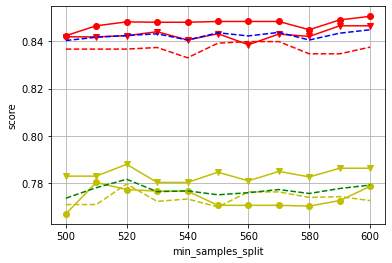

In [22]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [23]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

600 520


### _Results_ -> max_samples_split = 520

In [24]:
param_dict["max_samples_split"] = 520
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Min samples leaf

In [25]:
param_range = np.arange(5, 20, 2)
param_name = 'min_samples_leaf'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


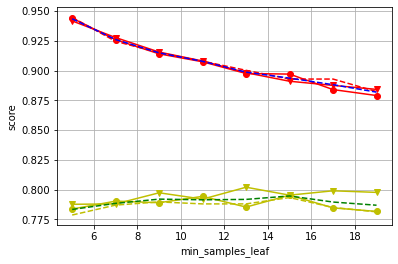

In [26]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [27]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

5 15


### Results: min_samples_leaf -> 15

In [28]:
param_dict['min_samples_leaf'] = 15
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### N-estimators

In [29]:
param_range = np.arange(100, 501, 100)
param_name = 'n_estimators'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.6min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


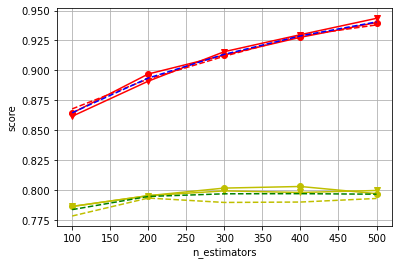

In [30]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [31]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

500 400


In [32]:
param_dict['n_estimators'] = 400
# since we are changing the value, redefine GBC object
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)
gb_clf.fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           1.2833           19.10s
         2           1.2364           16.27s
         3           1.1826           14.64s
         4           1.1502           14.02s
         5           1.1203           13.63s
         6           1.0944           13.29s
         7           1.0739           12.99s
         8           1.0570           12.75s
         9           1.0345           12.78s
        10           1.0152           12.68s
        20           0.9071           11.71s
        30           0.8469           11.82s
        40           0.8043           10.94s
        50           0.7707           10.12s
        60           0.7443            9.73s
        70           0.7188            9.40s
        80           0.6977            9.42s
        90           0.6807            8.97s
       100           0.6655            8.49s
       200           0.5595            5.12s
       300           0.4942            2.28s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.85, loss='deviance', max_depth=10,
                           max_features=0.05, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=15, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [38]:
validation_path = Path().resolve().parents[1] / 'data/gender_final_small.csv'
X_val = pd.read_csv(str(validation_path))
y_val = X_val["Gender"]
X_val.drop(labels="Gender", inplace=True, axis=1)

X_val = vectorizer.transform(X_val['Name'])
X_val = scaler.transform(X_val)

In [39]:
print("Training score ", round(gb_clf.score(X, y), 3))
print("Validation score ", round(gb_clf.score(X_val, y_val), 3))


Training score  0.921
Validation score  0.815


### Final values from the vc analysis:
`learning_rate`,     final = `0.85`

`max_features`,      final = `0.05`

`max_depth`,         final = `10`

`min_samples_split`, final = `520`

`min_samples_leaf`,  final = `15`

`n_estimators`,      final = `400`


In [ ]:
param_dict = {
    "learning_rate": 0.85,
    "max_features": 0.05,
    "max_depth": 10,
    "min_samples_split": 520,
    "min_samples_leaf": 15,
    "n_estimators": 400
}
